In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as datetime
import matplotlib.pyplot as plt
import plotly.express as px


import re  # regex

from bs4 import BeautifulSoup

import nltk
import nltk.corpus
from nltk.corpus import stopwords

#nltk.download()

from nltk.tokenize import word_tokenize
#from nltk import word_tokenize
nltk.download('punkt')

import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

from wordcloud import WordCloud, STOPWORDS
import collections

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
plt.style.use('default')
import squarify

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\godwi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\godwi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
aug = pd.read_csv("../web_scrap_database/aug.csv")
aug.shape

(180003, 7)

In [4]:
sep = pd.read_csv("../web_scrap_database/sep.csv")
sep.shape

(150003, 7)

In [5]:
name = pd.concat([aug,sep],axis =0)

In [6]:
name.drop_duplicates(subset = 'Tweet', keep = 'first', inplace = True)

In [7]:
name['Date Created'] = pd.to_datetime(name['Date Created'])

In [8]:
name['year'] = pd.DatetimeIndex(name['Date Created']).year.astype('str')
name['month'] = pd.DatetimeIndex(name['Date Created']).month.astype('str')
name['day'] = pd.DatetimeIndex(name['Date Created']).day.astype('str')

name['date'] =  name['year'] + '-' + name['month'] + '-' + name['day']
name['date'] = pd.to_datetime(name['date'])

In [9]:
name = name.drop(['User_name','Number of Likes',"year","month","day"], axis =1)


In [10]:
# #cleaning the tweets  tHIS ONE REMOVES or strips THE dupliate twitter hash tags e.g @ john @ timi, retains emorji , but makes space \n

# def remove_pattern(input_txt, pattern):
#     r = re.findall(pattern, input_txt)
#     for i in r:
#         input_txt = re.sub(i, '', input_txt)        
#     return input_txt
# def clean_tweets(tweets):
#     #remove twitter Return handles (RT @xxx:)
#     tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
#     #remove twitter handles (@xxx)
#     tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
#     #remove URL links (httpxxx)
#     tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
#     #remove special characters, numbers, punctuations (except for #)
#     tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
#     #remove new line
#     tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
#     return tweets


# name['tweet_preprocessed'] = name.Tweet.apply(lambda x :clean_tweets(x) )

In [11]:
import re
def clean_tweets(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  return text
name['tweet_preprocessed'] = name.Tweet.apply(lambda x :clean_tweets(x) )

In [12]:
# # stopword remover and preprocessing  channges emorji to lol also strip multiple hash tags

# stopwords = set(stopwords.words("english"))
# def clean_tweet(tweet):
#     if type(tweet) == np.float:
#         return ""
#     temp = tweet.lower()
#     temp = re.sub("'", "", temp) # to avoid removing contractions in english
#     temp = re.sub("@[A-Za-z0-9_]+","", temp)
#     temp = re.sub("#[A-Za-z0-9_]+","", temp)
#     temp = re.sub(r'http\S+', '', temp)
#     temp = re.sub('[()!?]', ' ', temp)
#     temp = re.sub('\[.*?\]',' ', temp)
#     temp = re.sub("[^a-z0-9]"," ", temp)
#     temp = temp.split()
#     temp = [w for w in temp if not w in stopwords]
#     temp = " ".join(word for word in temp)
#     return temp
# name['tweet_preprocessed'] = name.Tweet.apply(lambda x :clean_tweet(x) )

In [13]:
# removes only @ from hash tags and converts emoji to lol

# def clean_lemmatize_token(tweet):
#     stop_words = set(stopwords.words('english'))
    
#     cleaned = tweet.translate(str.maketrans('', '', string.punctuation)).lower()
#     tokenized = word_tokenize(cleaned)
#     filtered = [w for w in tokenized if not w in stop_words]
#     lemmatizer = WordNetLemmatizer()
#     lemmatized = []
#     for word in filtered:
#         lemmatized.append(lemmatizer.lemmatize(word))
#     to_remove = ['rt','mention','sxsw','link',"RT @[\w]*:"]
#     lemmatized = [w for w in lemmatized if w not in to_remove]
#     lemmatized = ' '.join(lemmatized)
#     return lemmatized

# name['tweet_preprocessed'] = name.Tweet.apply(lambda x :clean_lemmatize_token(x) )



In [14]:
#Use with TFIDF 

# from nltk.tokenize import WordPunctTokenizer
# tok = WordPunctTokenizer()
# # pat1 = r'@[A-Za-z0-9]+'
# # pat2 = r'https?://[A-Za-z0-9./]+'
# # combined_pat = r'|'.join((pat1, pat2))

# def tweet_cleaner(text):
#     # soup = BeautifulSoup(text, 'lxml')
#     # souped = soup.get_text()
#     # stripped = re.sub(combined_pat, '', souped)
#     # try:
#     #     clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
#     # except:
#     #     clean = stripped
#     # letters_only = re.sub("[^a-zA-Z]", " ", clean)
#     # lower_case = letters_only.lower()
#     # During the letters_only process two lines above, it has created unnecessay white spaces,
#     # I will tokenize and join together to remove unneccessary white spaces
#     words = tok.tokenize(lower_case)
#     return (" ".join(words)).strip()

In [15]:
#Use with TFIDF 
# # Tokenization
# tk = word_tokenize
# df['Tweet'].apply(tk)

In [16]:
#Use with TFIDF 
# stop_words = set(stopwords.words('english'))

# def cleaning_stopwords(text):
#     return " ".join([word for word in str(text).split() if word not in stop_words])

# df['tweet_stopword'] = df['Tweet'].apply(lambda x:cleaning_stopwords(x) )
# df.head()

In [17]:
name.head()

,location,Date Created,Source of Tweet,Tweet,name,date,tweet_preprocessed
0,"Kano, Nigeria",2022-08-26 23:59:50+00:00,Twitter for Android,"@renoomokri Truth be told, if you go through a...",Obi,2022-08-26,"Truth be told, if you go through all Reno twe..."
1,On Exile,2022-08-26 23:59:44+00:00,Twitter for Android,@fkeyamo Senior Advocate of Nonsense and Fake ...,Obi,2022-08-26,Senior Advocate of Nonsense and Fake News
2,NaN,2022-08-26 23:59:36+00:00,Twitter for iPhone,@Emma_Obaseki @ctsar_ct @jhonoguyng @Jujufores...,Obi,2022-08-26,Lol. Ok
3,"Enugu, Nigeria",2022-08-26 23:59:28+00:00,Twitter for Android,@Lagbajaomotamed @AdebowaleShogb3 @PeterObi Om...,Obi,2022-08-26,Omo Anambra and Imo state respectively rank...
4,NaN,2022-08-26 23:59:23+00:00,Twitter for Android,@taajoowolabi @renoomokri You like it or not P...,Obi,2022-08-26,You like it or not PDP and APC time is over ...


In [18]:
name.drop(name[name.tweet_preprocessed == ''].index,inplace = True)

In [19]:
name.date.value_counts()

2022-09-28    80218
2022-08-24    44199
2022-08-26    41173
2022-09-27    40871
2022-08-25    40616
2022-08-23    26179
2022-09-26    16137
2022-08-22    12585
2022-09-25     1096
Name: date, dtype: int64

# VADER FOR SENTIMENT

In [20]:
sentiments = SentimentIntensityAnalyzer()
name['Positive'] = name['Tweet'].apply(lambda x: sentiments.polarity_scores(x)['pos'])
name['Negative'] = name['Tweet'].apply(lambda x: sentiments.polarity_scores(x)['neu'])
name['Neutral'] = name['Tweet'].apply(lambda x: sentiments.polarity_scores(x)['neg'])
name['compound'] = name['Tweet'].apply(lambda x: sentiments.polarity_scores(x)['compound'])

In [21]:
score = name.compound.values
sentiment = []
for i in score:
    if i >=0.05 :
        sentiment.append('positive')
    elif i <= -0.05:
        sentiment.append('negative')
    else:
        sentiment.append('neutral')

In [22]:
name['sentiment']= sentiment

In [23]:
name['sentiment'] = sentiment
tweet_final = name.loc[:,['tweet_preprocessed','sentiment',"name"]]
tweet_final

,tweet_preprocessed,sentiment,name
0,"Truth be told, if you go through all Reno twe...",positive,Obi
1,Senior Advocate of Nonsense and Fake News,negative,Obi
2,Lol. Ok,positive,Obi
3,Omo Anambra and Imo state respectively rank...,positive,Obi
4,You like it or not PDP and APC time is over ...,positive,Obi
...,...,...,...
149997,Tinubu has travelled to London again for medi...,negative,Tinubu
149998,"So group supporting tinubu are been paid,whi...",positive,Tinubu
149999,Tinubu is a lover of Nigeria,positive,Tinubu
150001,"This is the man , check the history",neutral,Tinubu


In [24]:
tweet_final.sentiment.value_counts().to_frame()

,sentiment
positive,120683
neutral,101906
negative,80485


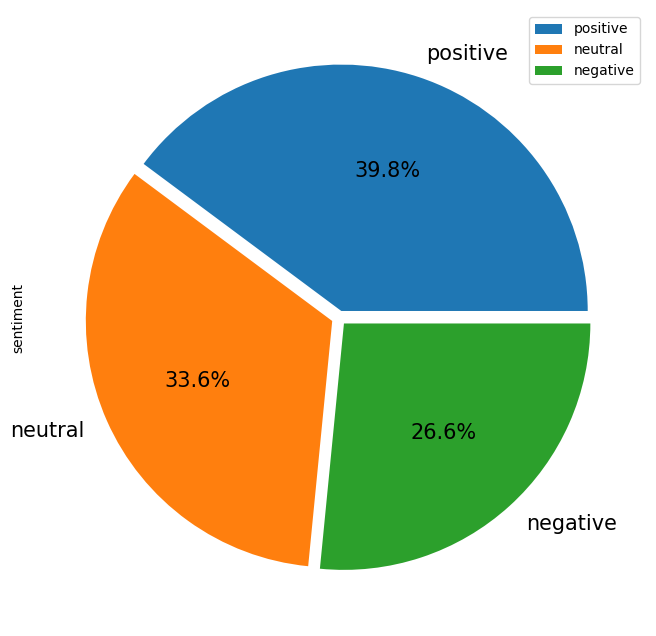

In [25]:
fig,ax = plt.subplots(figsize = (10,8))
tweet_final.sentiment.value_counts().plot(kind = 'pie',autopct='%1.1f%%',explode=[0.03,0.03,0.03],textprops={'fontsize': 15})
ax.legend()

In [26]:
tweet_final.sentiment.value_counts().to_frame()

,sentiment
positive,120683
neutral,101906
negative,80485


<AxesSubplot:ylabel='sentiment'>

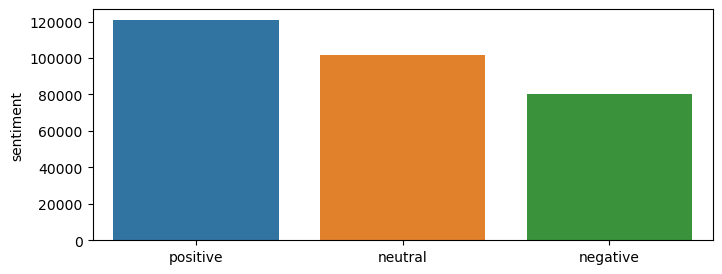

In [27]:
fig,ax = plt.subplots(figsize = (8,3))
sns.barplot(data = tweet_final.sentiment.value_counts().to_frame(), y = tweet_final.sentiment.value_counts().to_frame().sentiment,\
    x =tweet_final.sentiment.value_counts().to_frame().index)

In [28]:
tweet_final['sentiment_encoded'] = tweet_final.sentiment.apply(lambda x: 1 if x == 'positive' else -1 if x == 'negative' else 0)

In [29]:
tweet_final.loc[:, ["tweet_preprocessed", "sentiment","name"]][(tweet_final.loc[:, ["tweet_preprocessed", "sentiment","name"]].name == 'obi') & \
(tweet_final.loc[:, ["tweet_preprocessed", "sentiment","name"]].sentiment=="positive")]

,tweet_preprocessed,sentiment,name


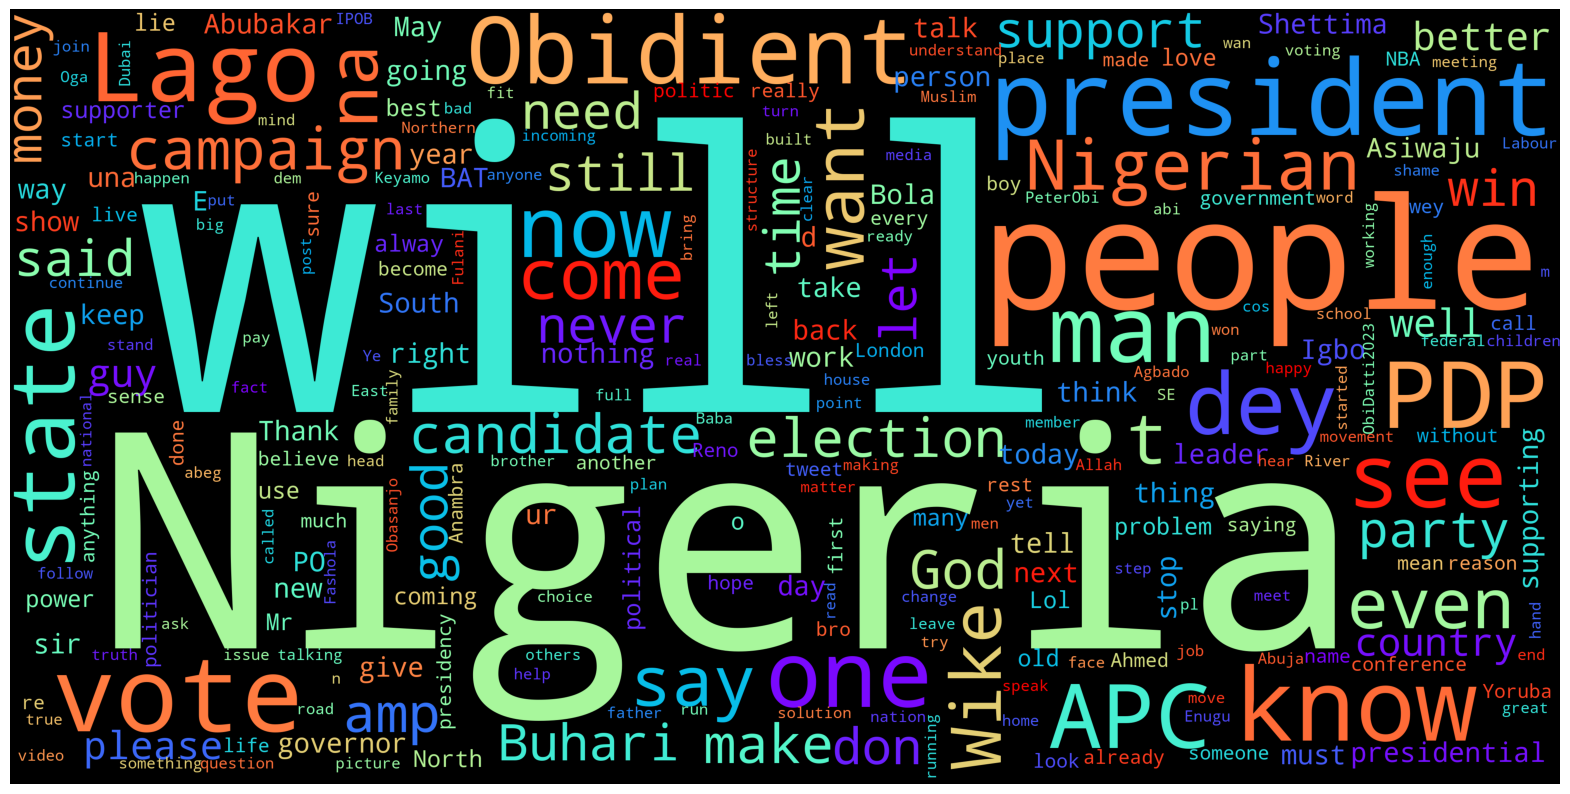

In [30]:
import collections

stopwords = STOPWORDS
stopwords.update(["https", "co","I","The","s","u","go","us","obi","Tinubu","atiku","peter"])


text = "".join(tweet_final.tweet_preprocessed)
fig, ax = plt.subplots(figsize = (20,20))
wc = WordCloud(stopwords=stopwords, max_words = 1000 , collocations=False , max_font_size=100, scale=10,\
    relative_scaling=.6, background_color="black", colormap = "rainbow", random_state=3).generate(text)
plt.axis("off")
ax.imshow(wc);

# tweet_final.loc[:, ["tweet_preprocessed", "sentiment","name"]]\
#     [(tweet_final.loc[:, ["tweet_preprocessed", "sentiment","name"]].name == 'Tinubu') & \
# (tweet_final.loc[:, ["tweet_preprocessed", "sentiment","name"]].sentiment=="negative")].tweet_preprocessed

In [31]:
filtered_words = [word for word in text.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

In [32]:
popular = pd.DataFrame(counted_words, index =[0]).T.reset_index().rename({"index":"word"},axis =1)\
    .rename({0 :"count"},axis =1).groupby("word").sum().sort_values("count",ascending= False)[:10]

In [33]:
popular

,count
word,
Atiku,47706
will,47235
Obi,24028
Nigeria,19544
Peter,18740
You,16760
people,16288
know,14779
one,13173


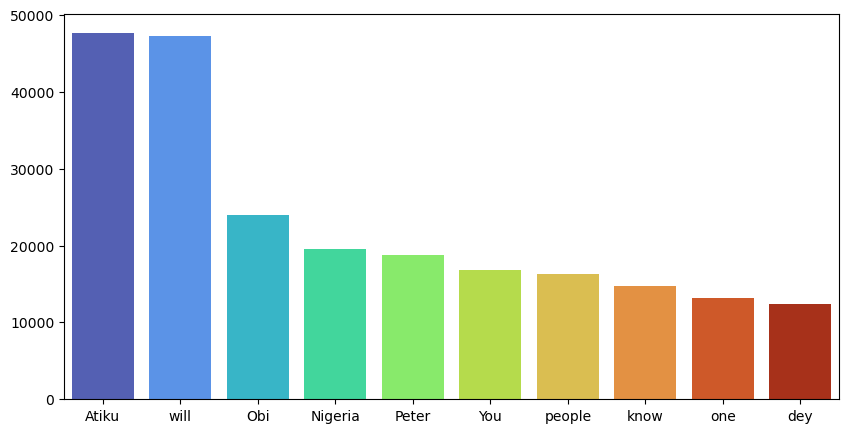

In [34]:
fig,ax =plt.subplots(figsize = (10,5))
sns.barplot(x = words, y = counts, palette= 'turbo')
plt.show()

<AxesSubplot:ylabel='Source of Tweet'>

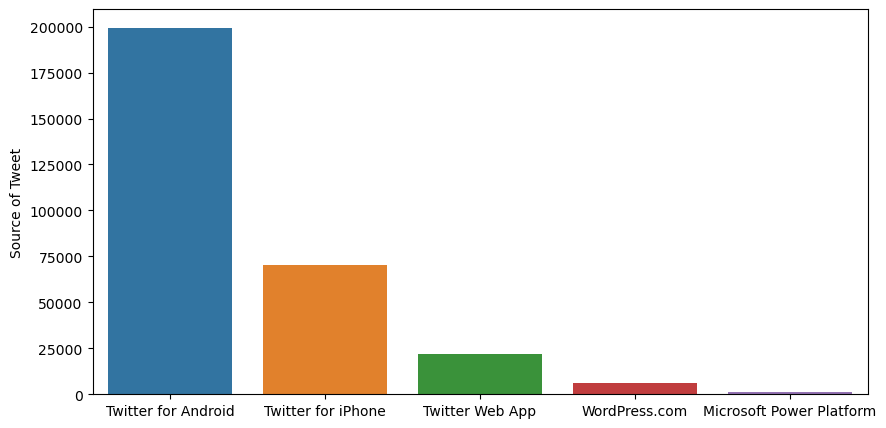

In [35]:
tweet_platform = name['Source of Tweet'].value_counts().head(5).to_frame()
fig,ax =plt.subplots(figsize = (10,5))
sns.barplot( data = tweet_platform,  x = tweet_platform.index,  y = tweet_platform["Source of Tweet"])

In [36]:
tweet_platform

,Source of Tweet
Twitter for Android,199459
Twitter for iPhone,70144
Twitter Web App,21936
WordPress.com,6028
Microsoft Power Platform,1266


In [37]:
sent_tab = pd.crosstab(name.name, name.sentiment).transpose()
fig = px.bar(sent_tab,barmode='group',text_auto=True)
fig.update_layout(width=1000,    height=500, title = 'Social Media Sentiments',title_x=0.5)
fig.update_traces(textposition='outside',textfont_size=11)
fig.show()


In [38]:
sent_tab

name,Atiku,Obi,Tinubu
sentiment,,,
negative,29104,23852,27529
neutral,32914,40096,28896
positive,41856,43693,35134


In [39]:
fig=px.pie(sent_tab.Tinubu, names = sent_tab.Tinubu.index, values = sent_tab.Tinubu.values,hole=.5)
fig.update_traces(textposition='outside', textinfo='percent+label',textfont_size=15)
fig.update_layout(autosize=False,title_text = "Negative Sentiments", )
fig.show()

In [40]:
sent_tab.to_csv("crosstab_sent.csv")

In [41]:
name.to_csv("influencers.csv", index = False)

# Perform cluster of variuos twitter users

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
name_vec = name.iloc[:, [6,11]]
name_vec

,tweet_preprocessed,sentiment
0,"Truth be told, if you go through all Reno twe...",positive
1,Senior Advocate of Nonsense and Fake News,negative
2,Lol. Ok,positive
3,Omo Anambra and Imo state respectively rank...,positive
4,You like it or not PDP and APC time is over ...,positive
...,...,...
149997,Tinubu has travelled to London again for medi...,negative
149998,"So group supporting tinubu are been paid,whi...",positive
149999,Tinubu is a lover of Nigeria,positive
150001,"This is the man , check the history",neutral


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
name_vec['sentiment_encode'] = name_vec['sentiment'].apply(lambda x: -1 if x == 'negative' else 0 if x == 'neutral' else 1 )

C:\Users\godwi\AppData\Local\Temp\ipykernel_14208\3731929696.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
name_vec

,tweet_preprocessed,sentiment,sentiment_encode
0,"Truth be told, if you go through all Reno twe...",positive,1
1,Senior Advocate of Nonsense and Fake News,negative,-1
2,Lol. Ok,positive,1
3,Omo Anambra and Imo state respectively rank...,positive,1
4,You like it or not PDP and APC time is over ...,positive,1
...,...,...,...
149997,Tinubu has travelled to London again for medi...,negative,-1
149998,"So group supporting tinubu are been paid,whi...",positive,1
149999,Tinubu is a lover of Nigeria,positive,1
150001,"This is the man , check the history",neutral,0


In [46]:
vectorizer = TfidfVectorizer(use_idf=True,stop_words='english')
X = name_vec.tweet_preprocessed
y = name_vec.sentiment

In [47]:
X = vectorizer.fit_transform(X)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [50]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

In [67]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.base import TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
# from sklearn.naive_bayes import MultinomialNB


# clf = RandomForestClassifier(random_state=42, n_estimators=50)
lr = LogisticRegression(max_iter=3000, random_state=42, n_jobs=-1)
# kn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
sgd = SGDClassifier(random_state=42, n_jobs=-1)
# nb = MultinomialNB(alpha=0.02)



models = { "LogisticRegression" : lr,
        #  "KNeighborsClassifier": kn,
         "SGDClassifier": sgd
        #  "GaussianNB" :nb
         }

for model in models.keys():
    scores = cross_val_score(models[model], X, y, cv=5)
    
    print('model:' ,model)
    print('score:', scores)
    print('mean:' ,scores.mean())
    models[model].fit(X_train, y_train)
    print("accuracy_score:", (models[model].score(X_test, y_test)))
    print("training score:", (models[model].score(X_train, y_train)))
    print()

KeyboardInterrupt: 

# Hypertuning 

In [52]:
from sklearn.model_selection import GridSearchCV
# defining parameter range 
param_grid = {"solver": [ 'lbfgs', 'liblinear'],
              "C" :[100, 20, 10, 1.0, 0.1, 0.01],
              "penalty" :['l2']
              }  
   
grid = GridSearchCV(lr, param_grid, refit = True, verbose = 3,n_jobs=-1,cv=5) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 


Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:1153: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.



{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [53]:
confusion_matrix(y_test, grid_predictions)

array([[12051,  1680,  2386],
       [  700, 18767,   909],
       [ 1855,  1472, 20795]], dtype=int64)

In [54]:
y_pred = lr.predict(X_test)
y_pred_probab = grid.predict_proba(X_test)

In [55]:
accuracy_score(y_test, grid_predictions)

0.8514889053864555

In [56]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

    negative       0.83      0.75      0.78     16117
     neutral       0.86      0.92      0.89     20376
    positive       0.86      0.86      0.86     24122

    accuracy                           0.85     60615
   macro avg       0.85      0.84      0.84     60615
weighted avg       0.85      0.85      0.85     60615



In [57]:
cm  = confusion_matrix(y_test, grid_predictions)
cm = pd.DataFrame(cm)
cm

,0,1,2
0,12051,1680,2386
1,700,18767,909
2,1855,1472,20795


<AxesSubplot:>

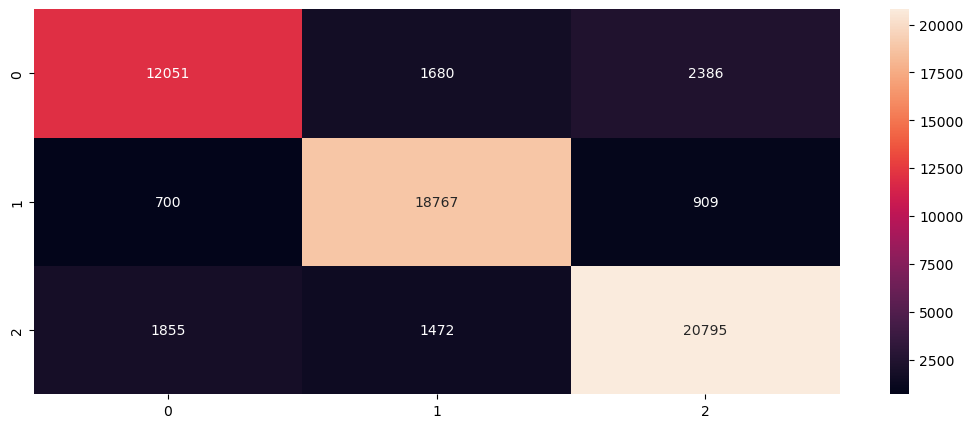

In [58]:
plt.subplots(figsize = (13,5))
sns.heatmap(cm, annot=True,fmt='g')

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

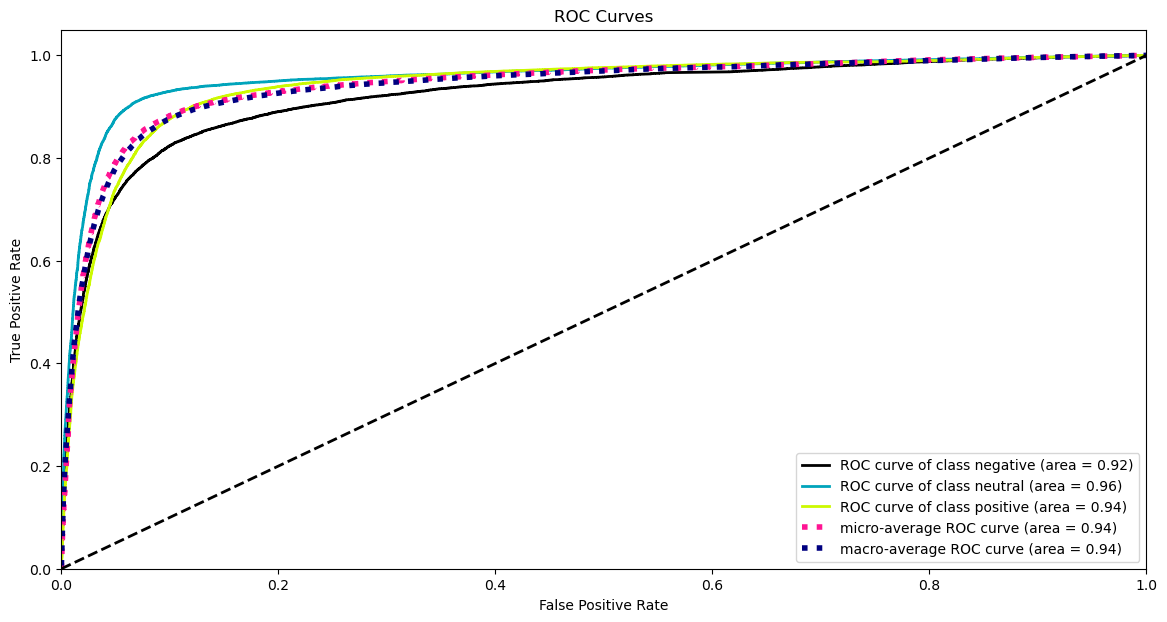

In [59]:
import scikitplot as skplt
fig, ax = plt.subplots(figsize=(14,7))
skplt.metrics.plot_roc(y_test, y_pred_probab,ax= ax)

In [60]:
inn = pd.read_csv("influencers.csv")

In [61]:
inn['month'] = pd.DatetimeIndex(inn.date).month

In [62]:
inn.to_csv("inn.csv", index= False)

In [63]:
inn.month.value_counts()

8    164752
9    138322
Name: month, dtype: int64

In [64]:
inn.shape

(303074, 13)

In [65]:
inn

,location,Date Created,Source of Tweet,Tweet,name,date,tweet_preprocessed,Positive,Negative,Neutral,compound,sentiment,month
0,"Kano, Nigeria",2022-08-26 23:59:50+00:00,Twitter for Android,"@renoomokri Truth be told, if you go through a...",Obi,2022-08-26,"Truth be told, if you go through all Reno twe...",0.130,0.870,0.000,0.5423,positive,8
1,On Exile,2022-08-26 23:59:44+00:00,Twitter for Android,@fkeyamo Senior Advocate of Nonsense and Fake ...,Obi,2022-08-26,Senior Advocate of Nonsense and Fake News,0.000,0.508,0.492,-0.7003,negative,8
2,NaN,2022-08-26 23:59:36+00:00,Twitter for iPhone,@Emma_Obaseki @ctsar_ct @jhonoguyng @Jujufores...,Obi,2022-08-26,Lol. Ok,0.455,0.545,0.000,0.6124,positive,8
3,"Enugu, Nigeria",2022-08-26 23:59:28+00:00,Twitter for Android,@Lagbajaomotamed @AdebowaleShogb3 @PeterObi Om...,Obi,2022-08-26,Omo Anambra and Imo state respectively rank...,0.078,0.922,0.000,0.4019,positive,8
4,NaN,2022-08-26 23:59:23+00:00,Twitter for Android,@taajoowolabi @renoomokri You like it or not P...,Obi,2022-08-26,You like it or not PDP and APC time is over ...,0.111,0.889,0.000,0.3612,positive,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303069,His Mercies are new every morn,2022-09-26 13:28:32+00:00,Twitter for Android,@firstladyship Tinubu has travelled to London ...,Tinubu,2022-09-26,Tinubu has travelled to London again for medi...,0.000,0.946,0.054,-0.3597,negative,9
303070,NaN,2022-09-26 13:28:31+00:00,Twitter for Android,@Nicole67_Green @MobilePunch So group supporti...,Tinubu,2022-09-26,"So group supporting tinubu are been paid,whi...",0.181,0.819,0.000,0.5482,positive,9
303071,"Lekki, Nigeria",2022-09-26 13:28:27+00:00,Twitter for Android,@fkeyamo @officialABAT Tinubu is a lover of Ni...,Tinubu,2022-09-26,Tinubu is a lover of Nigeria,0.388,0.612,0.000,0.5859,positive,9
303072,nigeria,2022-09-26 13:28:23+00:00,Twitter for Android,"@fkeyamo @officialABAT This is the man , check...",Tinubu,2022-09-26,"This is the man , check the history",0.000,1.000,0.000,0.0000,neutral,9
